
Testing image from category: buah
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


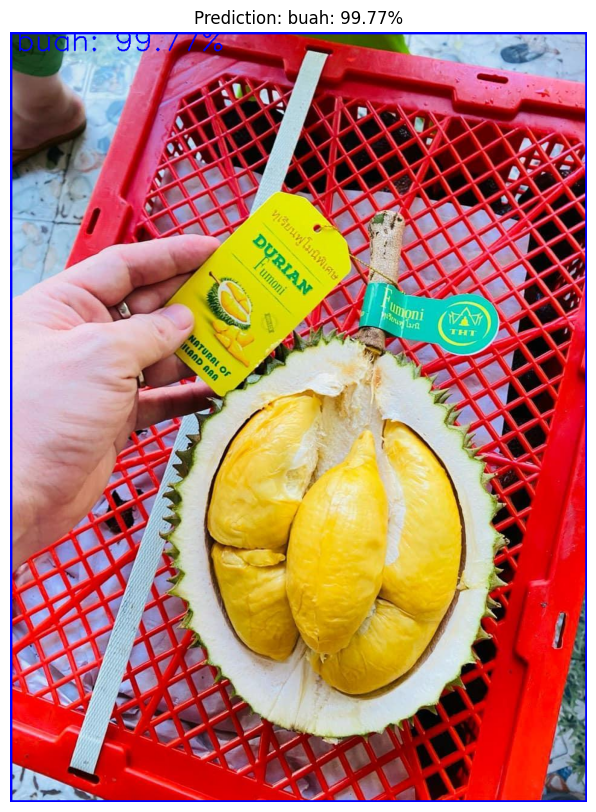


Testing image from category: karbohidrat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


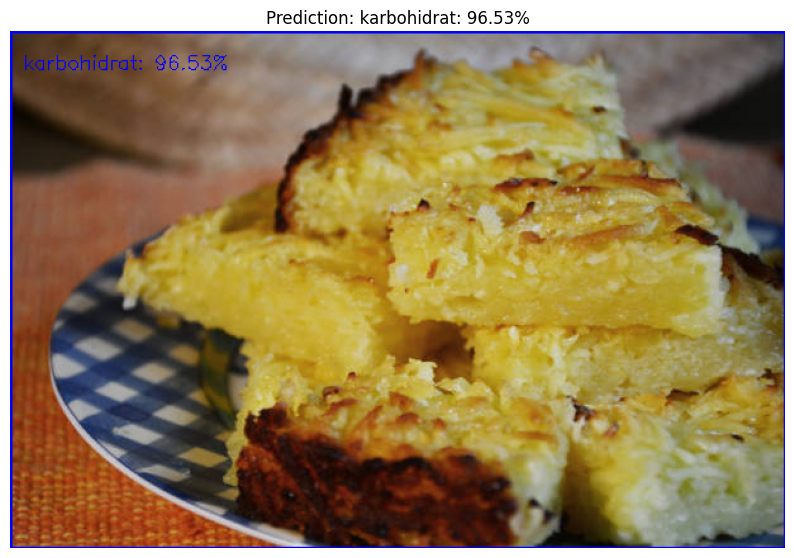


Testing image from category: minuman
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


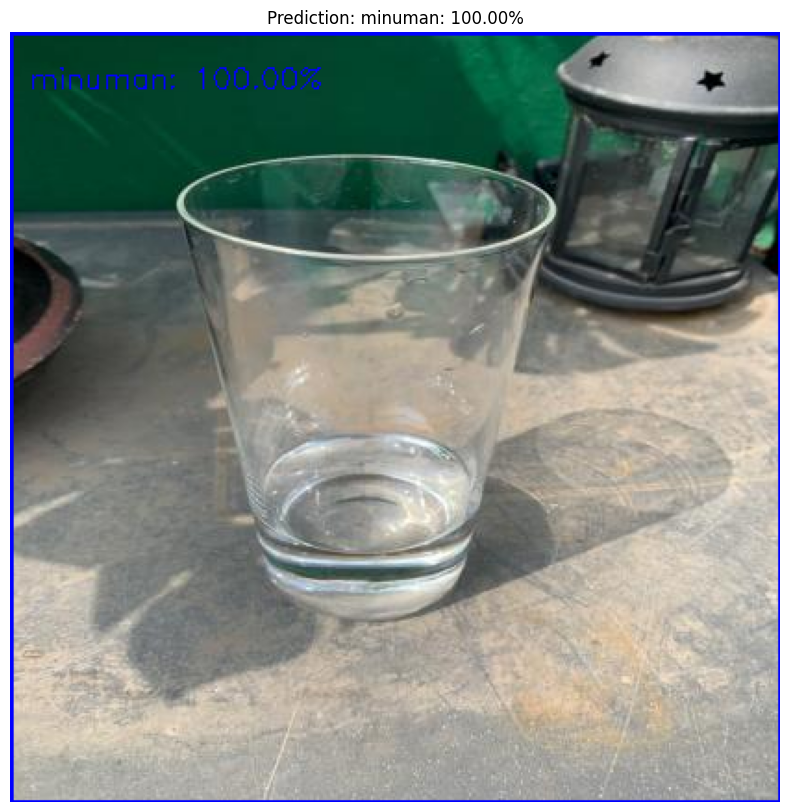


Testing image from category: protein
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


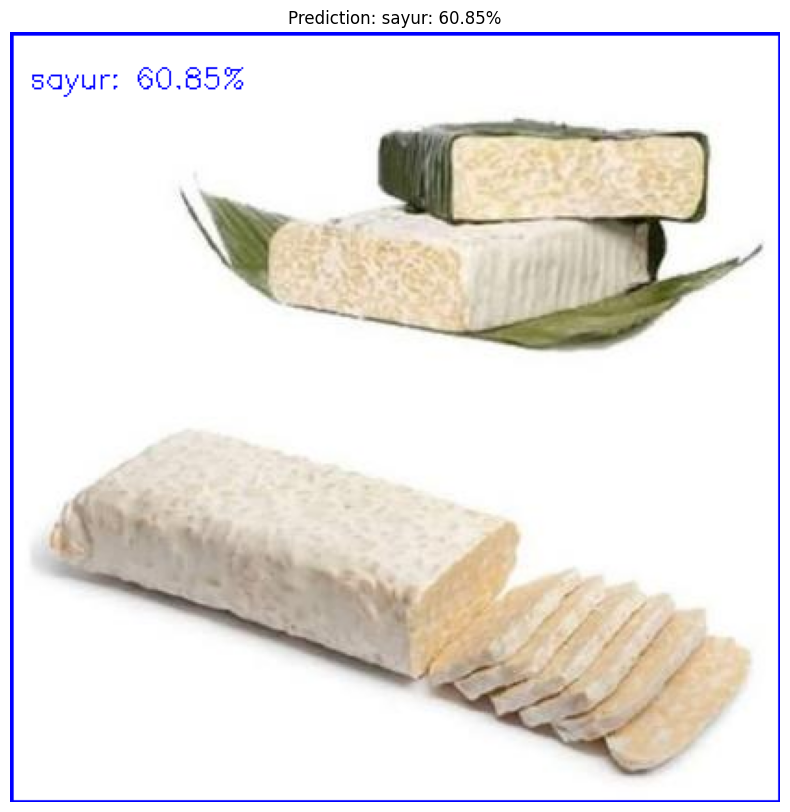


Testing image from category: sayur
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


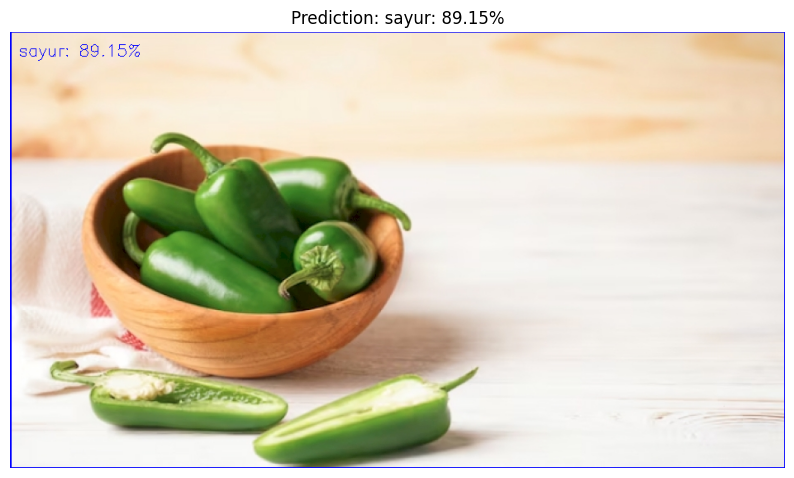


Test Accuracy: 80.00%


In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

# Load the saved model
model = tf.keras.models.load_model('model_terbaru.h5')

# Test directory path
test_dir = 'test'

# Class names
class_names = ['buah', 'karbohidrat', 'minuman', 'protein', 'sayur']

def predict_and_visualize(image_path):
    # Read the image
    original_image = cv2.imread(image_path)
    image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    
    # Preprocess the image
    # resized_image = cv2.resize(image, (150, 150))
    resized_image = cv2.resize(image, (224, 224))
    normalized_image = resized_image / 255.0
    input_image = np.expand_dims(normalized_image, axis=0)
    
    # Predict
    prediction = model.predict(input_image)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction)
    
    # Draw blue bounding box and prediction info
    h, w = original_image.shape[:2]
    thickness = max(1, int(h * 0.005))
    color = (255, 0, 0)  # Blue in BGR
    cv2.rectangle(original_image, (0, 0), (w, h), color, thickness)
    
    # Add text
    text = f"{predicted_class}: {confidence*100:.2f}%"
    font_scale = h / 800
    font_thickness = max(1, int(h * 0.002))
    cv2.putText(original_image, text, 
                (10, 30), 
                cv2.FONT_HERSHEY_SIMPLEX, 
                font_scale, 
                color, 
                font_thickness)
    
    # Convert back to RGB for matplotlib
    original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(original_image_rgb)
    plt.axis('off')
    plt.title(f'Prediction: {text}')
    plt.show()
    
    return predicted_class, confidence

# Function to test multiple random images
def test_random_images(num_images=5):
    results = []
    for category in class_names:
        category_path = os.path.join(test_dir, category)
        image_files = os.listdir(category_path)
        
        # Select a random image from the category
        if image_files:
            random_image = np.random.choice(image_files)
            image_path = os.path.join(category_path, random_image)
            
            print(f"\nTesting image from category: {category}")
            pred_class, confidence = predict_and_visualize(image_path)
            results.append({
                'true_category': category, 
                'predicted_category': pred_class, 
                'confidence': confidence,
                'correct': category == pred_class
            })
    
    # Compute accuracy
    accuracy = sum(1 for r in results if r['correct']) / len(results)
    print(f"\nTest Accuracy: {accuracy*100:.2f}%")
    
    return results

# Run the test
test_results = test_random_images()